In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Download/transformed_gpu_price.csv'
gpu_data = pd.read_csv(file_path)

gpu_data['TimeId'] = pd.to_datetime(gpu_data['TimeId'], format='%Y%m%d')

gpu_data_sorted = gpu_data.sort_values('TimeId')

split_index = int(0.8 * len(gpu_data_sorted))
train_data = gpu_data_sorted[:split_index]
test_data = gpu_data_sorted[split_index:]

basic_stats = train_data.describe()

print(basic_stats)

       ProdId    BTC_price   ETH_price   Price_USD  NVDA_stock   AMD_stock  \
count   687.0   687.000000  687.000000  687.000000  687.000000  687.000000   
mean      1.0   385.881245   61.742630  538.084583   12.035830    5.059156   
std       0.0   230.206934  108.218656   18.921171    8.545386    3.826282   
min       1.0    70.590000    0.451943  452.321347    4.258750    1.655000   
25%       1.0   220.202500    5.052500  533.927944    5.475625    2.325000   
50%       1.0   344.590000   11.215000  543.387152    7.981250    2.820000   
75%       1.0   574.265000   19.952500  549.617463   16.520000    6.862500   
max       1.0  1131.375000  390.620000  601.738413   38.973749   14.950000   

              PPI  
count  687.000000  
mean    57.842940  
std      0.637898  
min     56.600000  
25%     57.400000  
50%     57.600000  
75%     58.400000  
max     58.800000  


In [2]:
gpu_data.head()

,ProdId,TimeId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI
0,1,2014-09-17,123.000,1.300,601.738413,4.79125,3.840,58.8
1,1,2014-09-18,125.015,1.365,551.885277,4.83375,3.820,58.8
2,1,2014-09-19,129.785,1.305,548.098896,4.82125,3.875,58.8
3,1,2014-09-22,131.060,1.260,547.933078,4.79250,3.790,58.8
4,1,2014-09-23,133.310,1.270,548.146817,4.71750,3.740,58.8


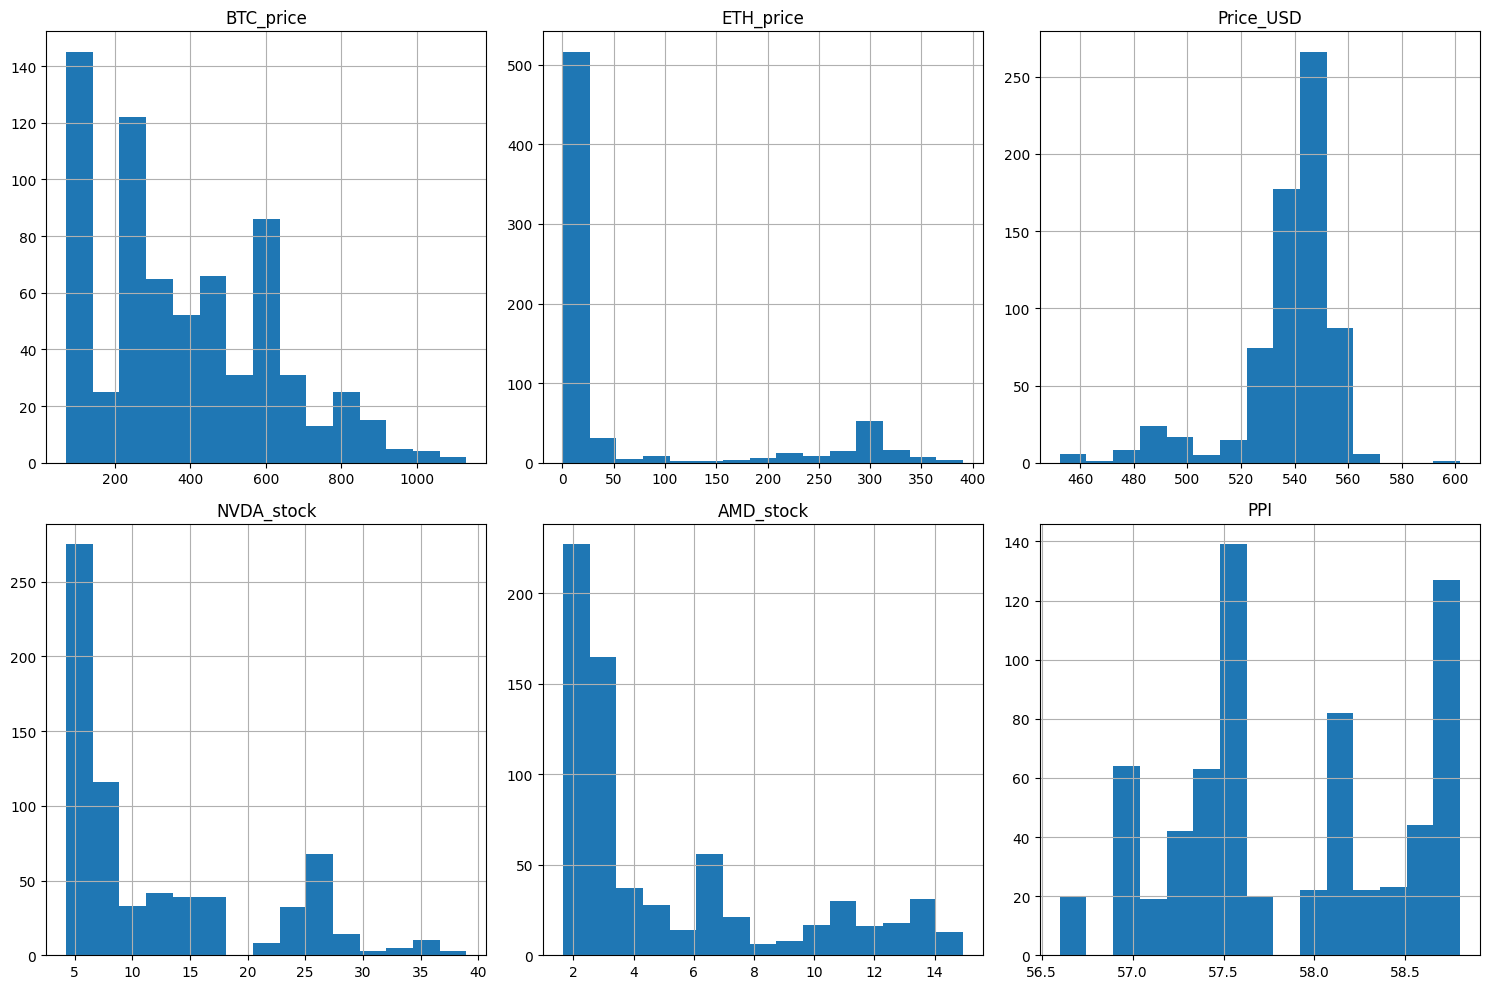

In [3]:
train_data_hist = train_data.drop(columns=['ProdId', 'TimeId'])
train_data_hist.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

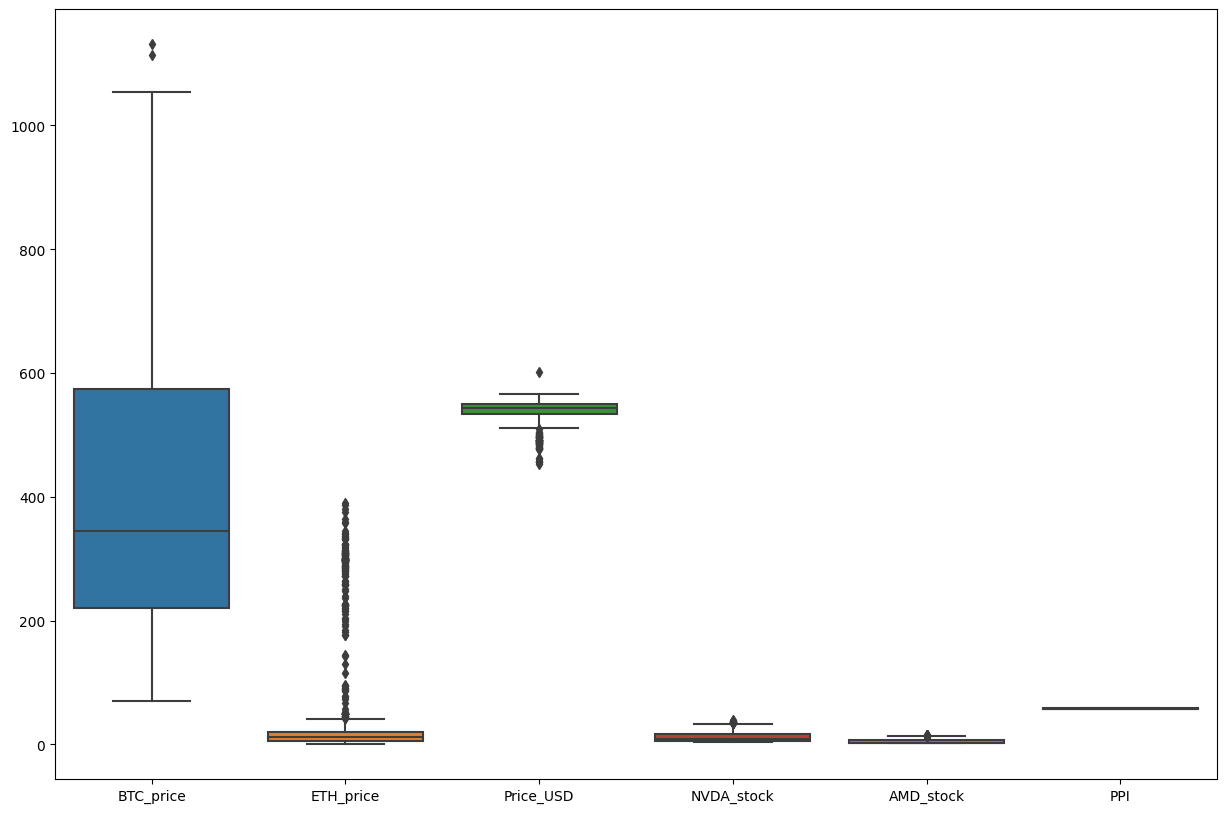

In [4]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data_hist)
plt.show()

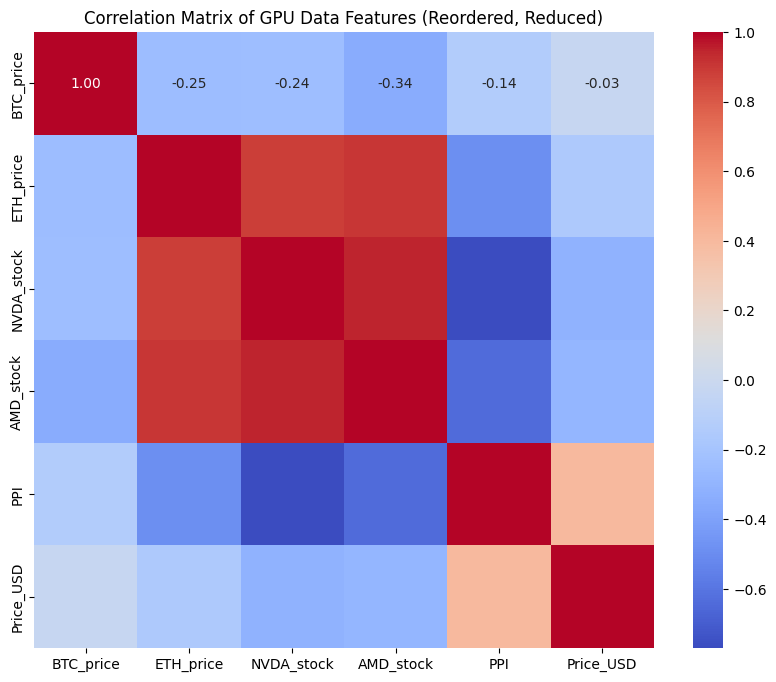

In [5]:
cols_reduced = list(train_data_hist.columns)
cols_reduced.append(cols_reduced.pop(cols_reduced.index('Price_USD'))) 
cols_reduced.insert(-1, cols_reduced.pop(cols_reduced.index('PPI')))

gpu_data_reordered_reduced = train_data_hist[cols_reduced]

correlation_matrix_reordered_reduced = gpu_data_reordered_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reordered_reduced, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of GPU Data Features (Reordered, Reduced)")
plt.show()

In [6]:
import pandas as pd

missing_values = train_data.isnull().sum()

Q1 = train_data['Price_USD'].quantile(0.25)
Q3 = train_data['Price_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data.loc[:, 'Price_USD'] = train_data['Price_USD'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

train_data_cleaned = train_data.dropna()

train_data_cleaned.loc[:, 'Price_USD'] = train_data_cleaned['Price_USD'].apply(
    lambda x: x if lower_bound <= x <= upper_bound else None
)

train_data_cleaned.loc[:, 'BTC_volatility'] = train_data_cleaned['BTC_price'].rolling(window=7).std()
train_data_cleaned.loc[:, 'ETH_volatility'] = train_data_cleaned['ETH_price'].rolling(window=7).std()

train_data_final = train_data_cleaned.dropna()

train_data_final.head()


C:\Users\dhwan\AppData\Local\Temp\ipykernel_30664\2042961336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'Price_USD'] = train_data['Price_USD'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
C:\Users\dhwan\AppData\Local\Temp\ipykernel_30664\2042961336.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned.loc[:, 'Price_USD'] = train_data_cleaned['Price_USD'].apply(
C:\Users\dhwan\AppData\Local\Temp\ipykernel_30664\2042961336.py:19: SettingWithCopy

,ProdId,TimeId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI,BTC_volatility,ETH_volatility
7,1,2014-09-29,130.125,1.275000,545.526037,4.64750,3.635,58.8,2.573347,0.037161
8,1,2014-09-30,129.625,1.255000,547.592340,4.60875,3.600,58.8,1.597886,0.027903
9,1,2014-10-01,128.150,1.230000,548.326211,4.60125,3.490,58.8,1.792832,0.033166
10,1,2014-10-02,128.490,1.180000,549.238244,4.60375,3.360,58.8,1.817745,0.049135
11,1,2014-10-06,122.225,1.055338,550.801413,4.51250,3.360,58.8,2.739697,0.092397


In [7]:
test_data = test_data.dropna(subset=['BTC_price', 'ETH_price'])

combined_data = pd.concat([train_data_cleaned.iloc[-6:], test_data])

combined_data['BTC_volatility'] = combined_data['BTC_price'].rolling(window=7).std(ddof=0)
combined_data['ETH_volatility'] = combined_data['ETH_price'].rolling(window=7).std(ddof=0)

test_data_volatility = combined_data.iloc[-len(test_data):]

test_data_volatility = test_data_volatility.dropna()

test_data_volatility.head()

,ProdId,TimeId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI,BTC_volatility,ETH_volatility
687,1,2017-06-30,280.155,328.470,551.112278,38.906250,12.515,56.6,1.827280,7.364104
688,1,2017-07-03,278.380,335.360,548.196431,36.726250,11.810,56.4,1.801522,9.631641
689,1,2017-07-04,270.320,329.885,554.941564,37.552500,12.075,56.4,4.287630,10.471891
690,1,2017-07-05,263.735,331.240,547.130555,37.820000,11.850,56.4,7.062103,10.195336
691,1,2017-07-06,264.815,338.655,550.140683,37.512501,11.395,56.4,7.878271,9.637508


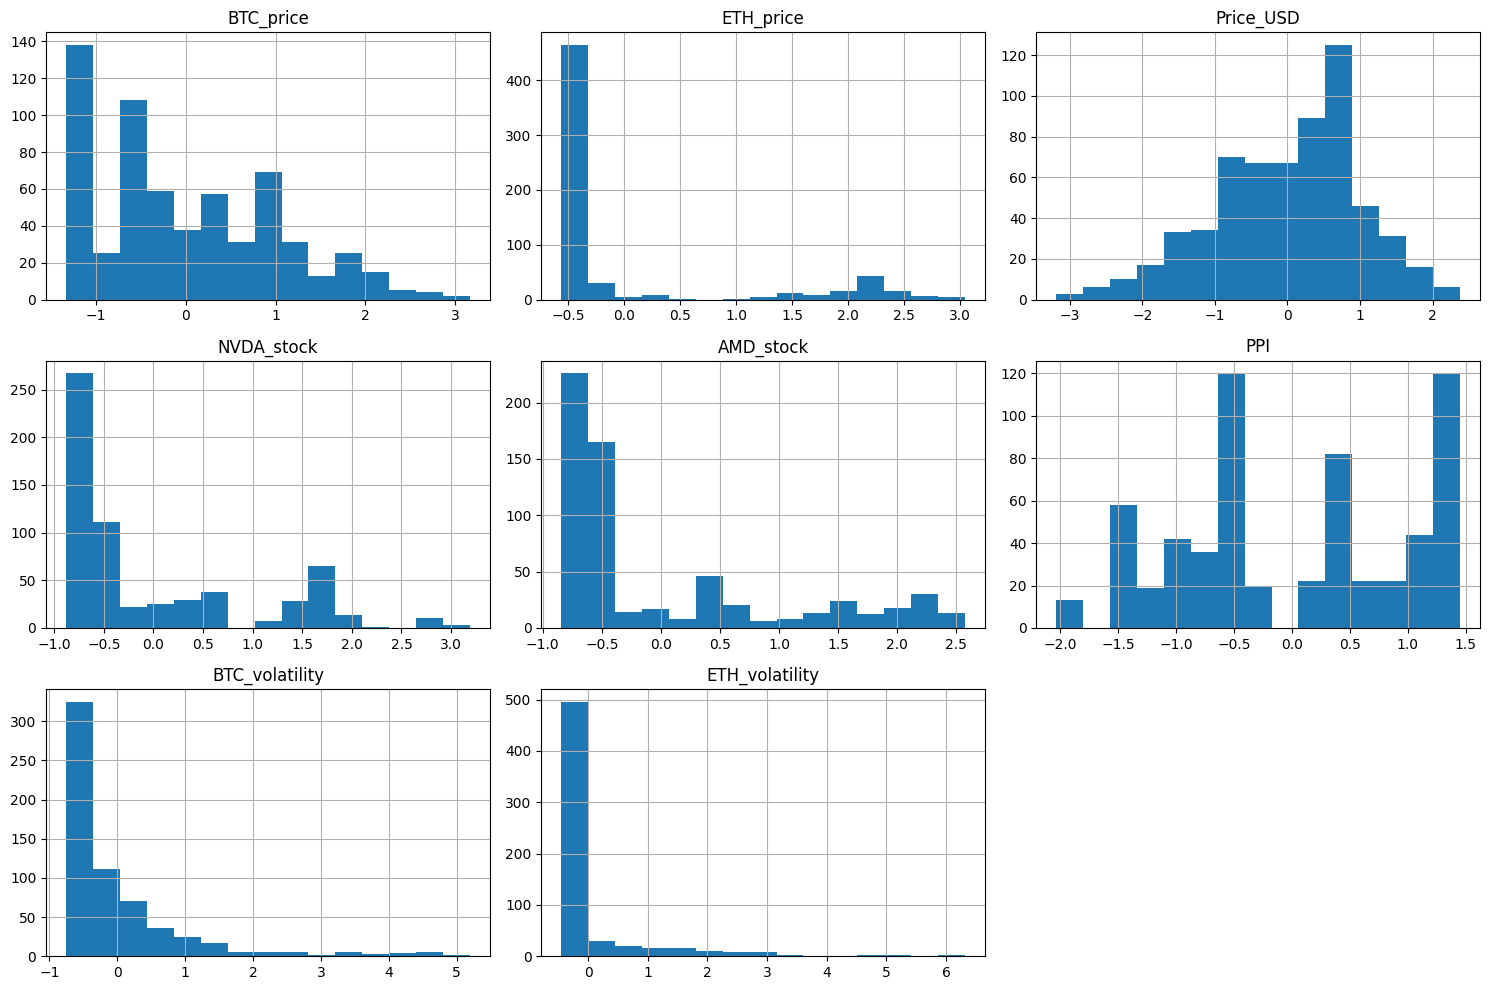

In [8]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaling_features = ['BTC_price', 'ETH_price', 'Price_USD', 'NVDA_stock', 'AMD_stock', 'PPI', 
                    'BTC_volatility', 'ETH_volatility']

scaler = StandardScaler()

train_data_scaled = train_data_final.copy()
train_data_scaled[scaling_features] = scaler.fit_transform(train_data_final[scaling_features])

test_data_scaled = test_data_volatility.copy()
test_data_scaled[scaling_features] = scaler.transform(test_data_volatility[scaling_features])


train_data_scaled_hist = train_data_scaled[scaling_features]
train_data_scaled_hist.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

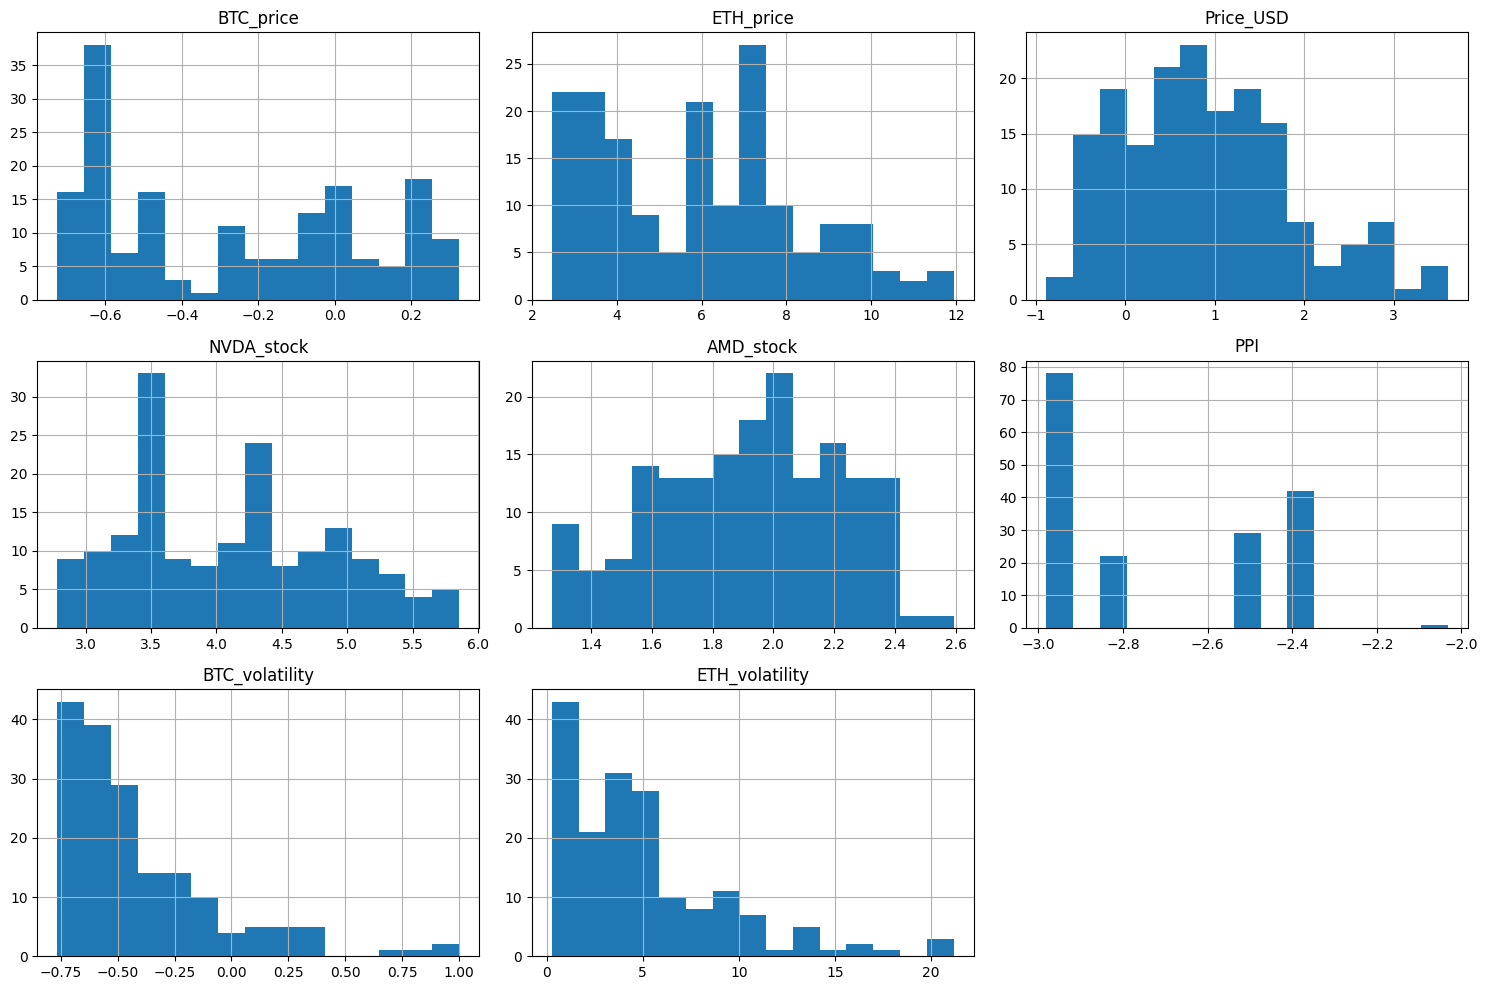

In [9]:
test_data_scaled_hist = test_data_scaled[scaling_features]
test_data_scaled_hist.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

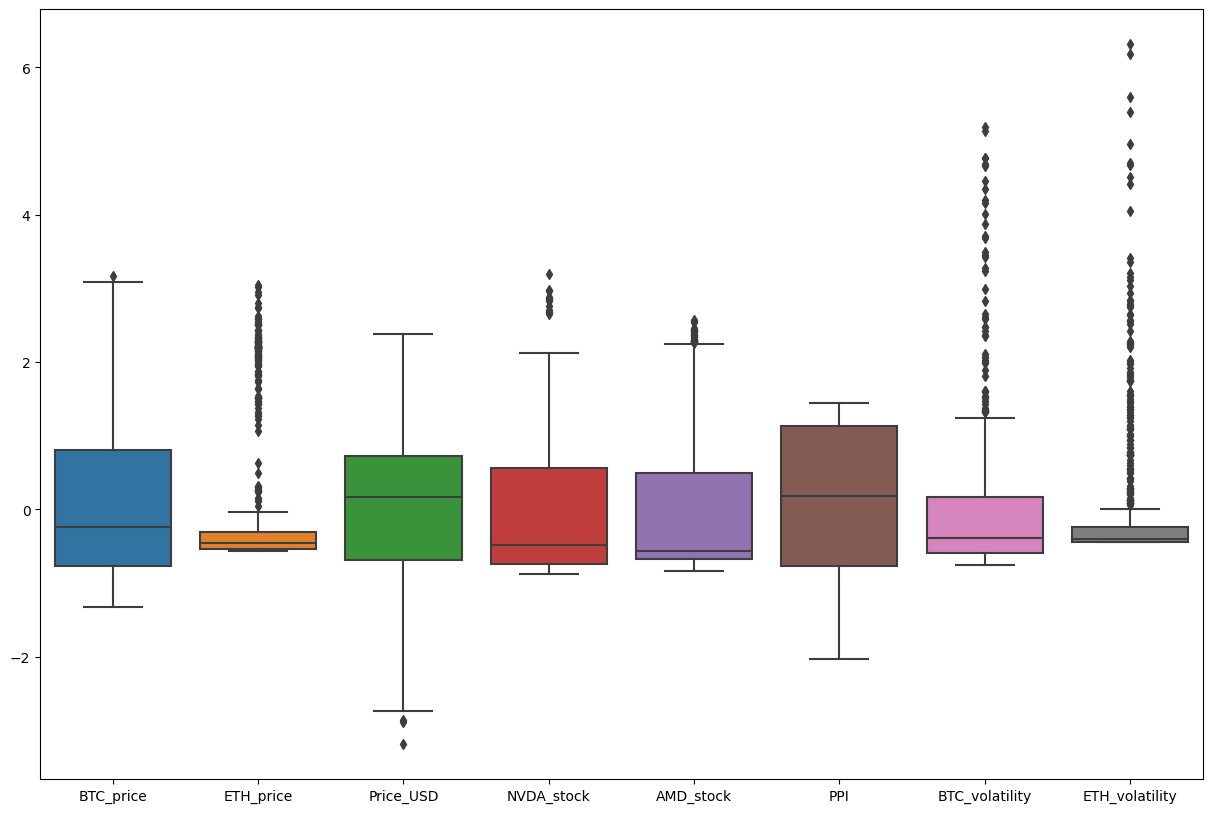

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data_scaled_hist)
plt.show()

In [12]:
scaled_data_stats = train_data_scaled.describe()

scaled_data_stats

,ProdId,BTC_price,ETH_price,Price_USD,NVDA_stock,AMD_stock,PPI,BTC_volatility,ETH_volatility
count,620.0,6.200000e+02,6.200000e+02,6.200000e+02,620.000000,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02
mean,1.0,1.833659e-16,9.168293e-17,-9.557946e-15,0.000000,1.833659e-16,2.567122e-15,-4.584147e-17,-6.876220e-17
std,0.0,1.000807e+00,1.000807e+00,1.000807e+00,1.000807,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00
min,1.0,-1.327635e+00,-5.639548e-01,-3.188460e+00,-0.878444,-8.434793e-01,-2.031779e+00,-7.505820e-01,-4.503213e-01
25%,1.0,-7.674233e-01,-5.360041e-01,-6.825882e-01,-0.742540,-6.776925e-01,-7.660637e-01,-5.980299e-01,-4.381798e-01
50%,1.0,-2.399599e-01,-4.631561e-01,1.652431e-01,-0.488306,-5.607421e-01,1.832224e-01,-3.893768e-01,-4.006768e-01
75%,1.0,8.026759e-01,-3.141865e-01,7.208445e-01,0.560117,4.937392e-01,1.132509e+00,1.666879e-01,-2.407697e-01
max,1.0,3.160551e+00,3.046460e+00,2.376681e+00,3.188716,2.573785e+00,1.448937e+00,5.191858e+00,6.314290e+00


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['BTC_price', 'ETH_price', 'NVDA_stock', 'AMD_stock', 'PPI', 'BTC_volatility', 'ETH_volatility']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = train_data_scaled.drop('Price_USD', axis=1)
y_train = train_data_scaled['Price_USD']

X_train_transformed = pipeline.fit_transform(X_train)

print(X_train_transformed.shape)

(620, 7)


In [30]:
from sklearn.model_selection import TimeSeriesSplit

# 3-분할 교차 검증 설정
tscv = TimeSeriesSplit(n_splits=3)

# 선형 회귀 모델 교차 검증
cv_scores_lr = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

rmse_scores_lr = np.sqrt(-cv_scores_lr)

mean_mse_lr = -np.mean(cv_scores_lr)
mean_rmse_lr = np.mean(rmse_scores_lr)
std_rmse_lr = np.std(rmse_scores_lr)

print(f"[Linear Regression] Mean MSE: {mean_mse_lr}")
print(f"[Linear Regression] Mean RMSE: {mean_rmse_lr}")
print(f"[Linear Regression] Standard Deviation of RMSE: {std_rmse_lr}")


[Linear Regression] Mean MSE: 1.7964049785616432
[Linear Regression] Mean RMSE: 1.324208670349982
[Linear Regression] Standard Deviation of RMSE: 0.2070661148801895


In [20]:
# 결정 트리 모델 교차 검증
cv_scores_dt = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

rmse_scores_dt = np.sqrt(-cv_scores_dt)

mean_mse_dt = -np.mean(cv_scores_dt)
mean_rmse_dt = np.mean(rmse_scores_dt)
std_rmse_dt = np.std(rmse_scores_dt)

print(f"[Decision Tree] Mean MSE: {mean_mse_dt}")
print(f"[Decision Tree] Mean RMSE: {mean_rmse_dt}")
print(f"[Decision Tree] Standard Deviation of RMSE: {std_rmse_dt}")


[Decision Tree] Mean MSE: 1.7772043318855089
[Decision Tree] Mean RMSE: 1.318305680587133
[Decision Tree] Standard Deviation of RMSE: 0.19817786056268988


In [21]:
# 랜덤 포레스트 모델 교차 검증
cv_scores_rf = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

rmse_scores_rf = np.sqrt(-cv_scores_rf)

mean_mse_rf = -np.mean(cv_scores_rf)
mean_rmse_rf = np.mean(rmse_scores_rf)
std_rmse_rf = np.std(rmse_scores_rf)

print(f"[Random Forest] Mean MSE: {mean_mse_rf}")
print(f"[Random Forest] Mean RMSE: {mean_rmse_rf}")
print(f"[Random Forest] Standard Deviation of RMSE: {std_rmse_rf}")


[Random Forest] Mean MSE: 1.7498610655627733
[Random Forest] Mean RMSE: 1.3062309728691914
[Random Forest] Standard Deviation of RMSE: 0.20885811231546514


In [23]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 파이프라인에 추가
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# GridSearchCV 설정
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt'],
}

grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_mse_rf = -grid_search_rf.best_score_
best_rmse_rf = np.sqrt(best_mse_rf)

print("Best hyperparameters for RandomForest:", best_params_rf)
print("Best MSE for RandomForest:", best_mse_rf)
print("Best RMSE for RandomForest:", best_rmse_rf)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best hyperparameters for RandomForest: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Best MSE for RandomForest: 1.3121149082790293
Best RMSE for RandomForest: 1.1454758436034473


In [27]:
from sklearn.metrics import mean_squared_error

# GridSearchCV로부터 최적의 하이퍼파라미터 추출
best_params = grid_search_rf.best_params_

# 훈련 데이터에 전처리 파이프라인 적용
X_train_transformed = preprocessor.fit_transform(train_data_scaled.drop('Price_USD', axis=1))

# 최적의 하이퍼파라미터로 랜덤 포레스트 모델 생성
optimized_rf = RandomForestRegressor(
    n_estimators=best_params_rf['model__n_estimators'],
    max_depth=best_params_rf['model__max_depth'],
    min_samples_split=best_params_rf['model__min_samples_split'],
    min_samples_leaf=best_params_rf['model__min_samples_leaf'],
    max_features=best_params_rf['model__max_features'],
    random_state=42
)

# 전처리된 훈련 데이터로 모델 훈련
optimized_rf.fit(X_train_transformed, y_train)

# 테스트 데이터에 전처리 파이프라인 적용
X_test_transformed = preprocessor.transform(test_data_scaled.drop('Price_USD', axis=1))

# 테스트 데이터에 대한 예측 수행
y_pred = optimized_rf.predict(X_test_transformed)

# 성능 평가: MSE 및 RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Test MSE:", mse)
print("Test RMSE:", rmse)

Test MSE: 2.385594495598424
Test RMSE: 1.5445369842119105
